In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
database = pd.read_csv("Country-data.csv")
database.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
mapping_df = pd.read_csv("continents2.csv")
mapping_df = mapping_df.rename(columns = {'name' : 'country'})
data = pd.merge(database, mapping_df[['country', 'region']], on="country", how="left")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,region
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Asia
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Europe
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Africa
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Africa
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Americas


<ipython-input-65-d9312f7736a5>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  random_countries = richest_countries.append(poorest_countries[:1])


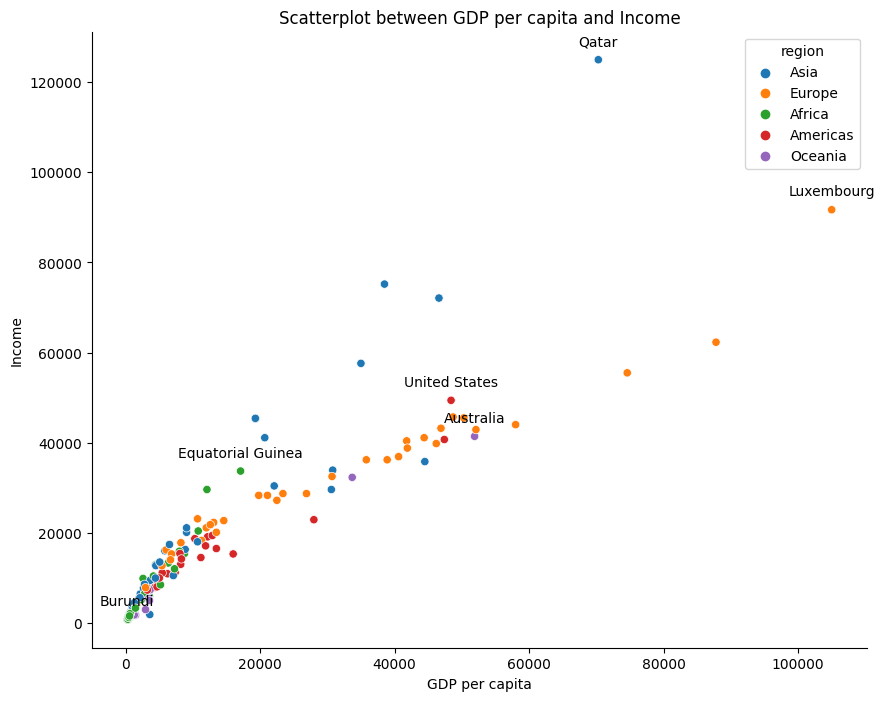

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=data, x='gdpp', y='income', hue='region', ax=ax)

poorest_countries = data.sort_values('gdpp').groupby('region').first()['country']
richest_countries = data.sort_values('gdpp').groupby('region').last()['country']
random_countries = richest_countries.append(poorest_countries[:1])
for country in random_countries:
    x = data.loc[data['country'] == country, 'gdpp'].values[0]
    y = data.loc[data['country'] == country, 'income'].values[0]
    ax.annotate(country, (x, y), textcoords="offset points", xytext=(0,10), ha='center')
    
ax.set_xlabel('GDP per capita')
ax.set_ylabel('Income')
ax.set_title('Scatterplot between GDP per capita and Income')


sns.despine()

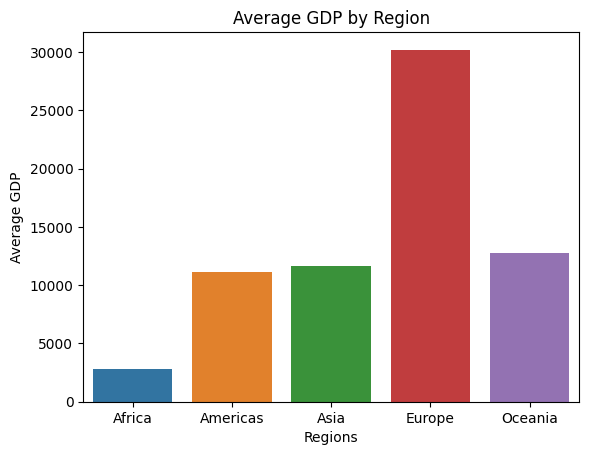

In [ ]:
sns.barplot(data = data.groupby(by = 'region',).mean(), x =data.groupby(by = 'region',).mean().index, y = 'gdpp' )
plt.title("Average GDP by Region")
plt.xlabel("Regions")
plt.ylabel("Average GDP")
plt.show()

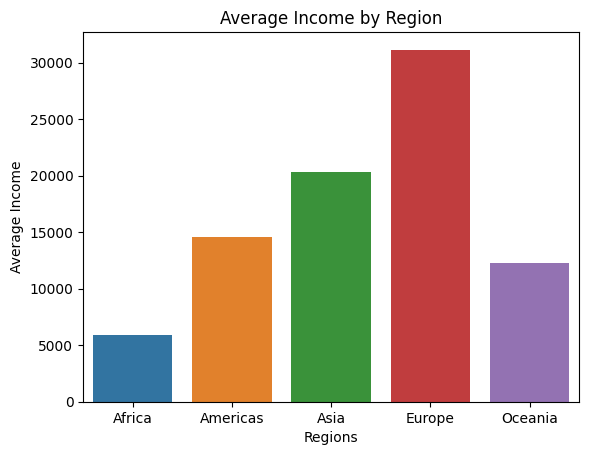

In [ ]:
sns.barplot(data = data.groupby(by = 'region',).mean(), x =data.groupby(by = 'region',).mean().index, y = 'income' )
plt.title("Average Income by Region")
plt.xlabel("Regions")
plt.ylabel("Average Income")
plt.show()